In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

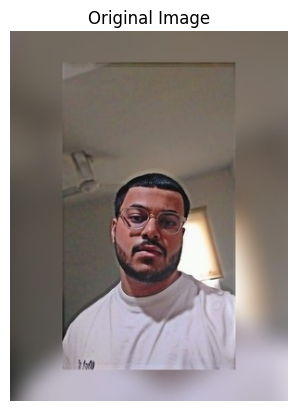

In [2]:
image = cv2.imread("SampleImage.jpeg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

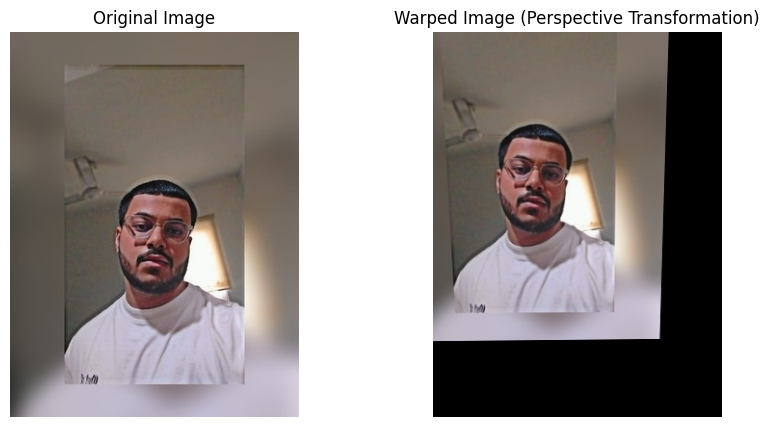

In [3]:
(h, w) = image.shape[:2]

pts1 = np.float32([[50, 65], [370, 52], [30, 387], [390, 390]])

pts2 = np.float32([[0, 0], [310, 0], [0, 310], [310, 310]])

matrix_persp = cv2.getPerspectiveTransform(pts1, pts2)

warped_image = cv2.warpPerspective(image, matrix_persp, (w, h))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(warped_image)
plt.axis("off")
plt.title("Warped Image (Perspective Transformation)")
plt.show()

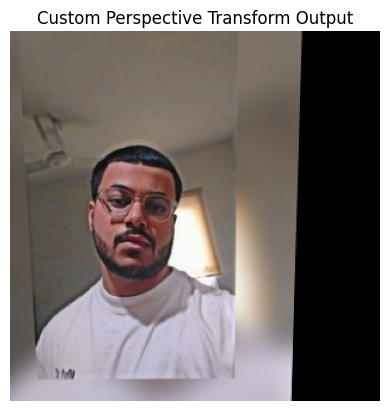

In [4]:
def perspective_transform(f, x1, y1, x2, y2, x3, y3, x4, y4, width, height):
    """
    Custom Perspective Transformation function (without OpenCV)
    Maps a quadrilateral defined by (x1,y1), (x2,y2), (x3,y3), (x4,y4)
    to a new image of specified width and height.
    """
    # Define input and output points
    pts1 = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)
    pts2 = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)

    A = []
    for i in range(4):
        x, y = pts1[i][0], pts1[i][1]
        u, v = pts2[i][0], pts2[i][1]
        A.append([-x, -y, -1, 0, 0, 0, x*u, y*u, u])
        A.append([0, 0, 0, -x, -y, -1, x*v, y*v, v])

    A = np.array(A, dtype=np.float32)
    U, S, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)  # Perspective transformation matrix

    transformed_image = cv2.warpPerspective(f, H, (width, height))

    return transformed_image

output_image = perspective_transform(image, 50, 65, 370, 52, 30, 387, 390, 390, 310, 310)

plt.imshow(output_image)
plt.axis("off")
plt.title("Custom Perspective Transform Output")
plt.show()

In [ ]:
output_image_large = perspective_transform(image, 50, 65, 370, 52, 30, 387, 390, 390, 400, 250)

# Display transformed image
plt.imshow(output_image_large)
plt.axis("off")
plt.title("Perspective Transform (Unequal Width & Height)")
plt.show()